# Human Voice Classification and Clustering - Data Analysis

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For plotting (we'll use this soon)
import matplotlib.pyplot as plt
import seaborn as sns

# To make plots appear inline in the notebook
%matplotlib inline

# Optional: Improve the aesthetics of plots
plt.style.use('seaborn-v0_8-whitegrid') # Adjust style name if needed (e.g., 'seaborn-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
# Define the path to the data file using the project structure
data_file_path = "../data/vocal_gender_features_new.csv"

# Load the data into a Pandas DataFrame
# The dataset doesn't have headers in the CSV file itself
df = pd.read_csv(data_file_path, header=None)

print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
df.head() # Display the first 5 rows

Data loaded successfully!
Dataset shape: (16149, 44)


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
1,2247.3317386694885,1158.5377479627396,1870.4154617213685,370.40524126981836,21.44070973910965,0.036878686,4419.438073394495,0.16924096903669725,0.08255184,1592.1033,...,21.73624,2.3030853,8.983318,-17.410305,9.115154,0.30180356,10.452693,-3.0808318,10.146248,0
2,1790.7198885341024,996.5548248590285,1757.8986167468183,410.7103177834014,21.513383444311525,0.018935613,3635.7421875,0.10806783040364583,0.055476625,1112.6351,...,13.937135,-0.9539423,10.831742,-0.08877484,10.29769,-7.2811418,10.926579,-0.450248,8.489134,0
3,1977.9233634651953,1010.1486667795253,1747.0995546714869,461.4583789847496,20.476282729226075,0.03261628,3873.291015625,0.14463297526041666,0.060388464,1557.5225,...,14.900779,0.26009753,14.031009,-0.42066953,10.810292,-0.19982924,11.986182,3.3729858,9.285437,0
4,2037.7655496871362,1311.4406297606188,1745.2248519221325,419.05648424257623,19.516014491022776,0.028481863,3826.5845070422533,0.14893265845070422,0.029559094,1481.0868,...,15.957924,-1.4861215,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.9469657,10.574301,0


In [10]:
# --- Basic Data Inspection ---

# 1. Shape of the dataset (rows, columns)
print("Dataset Shape (rows, columns):", df.shape)

# 2. Column names (should now be correct)
print("\nColumn Names:")
print(df.columns.tolist())

# 3. Data types of each column
print("\nData Types:")
print(df.dtypes)

# 4. Basic statistics for numerical columns
print("\nBasic Statistics (Numerical Columns):")
df.describe() # This will be displayed as a table

# 5. Check for missing values
print("\nMissing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Show only columns with missing values, if any
if missing_values.sum() == 0:
    print("No missing values found.")

# 6. Check the 'label' column specifically
print("\nLabel Column Value Counts:")
print(df['label'].value_counts())
print(f"Unique labels: {df['label'].unique()}")

Dataset Shape (rows, columns): (16149, 44)

Column Names:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

Data Types:
0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
33    object
34    object
35    object
36    object
37    object
38    object
39    object
40    object
41    object
42    object
43    object
dtype: object

Basic Statistics (Numerical Columns):

Missing Values per Column:
Series([], dtype: int64)
No missing values found.

Label Column Value Counts:


KeyError: 'label'

In [11]:
# --- Reload Data Correctly ---

# Path to the data file
data_file_path = "../data/vocal_gender_features_new.csv"

# Define the correct column names based on the PDF and the last row of the CSV
column_names = [
    'mean_spectral_centroid', 'std_spectral_centroid',
    'mean_spectral_bandwidth', 'std_spectral_bandwidth',
    'mean_spectral_contrast', 'mean_spectral_flatness',
    'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
    'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch',
    'spectral_skew', 'spectral_kurtosis',
    'energy_entropy', 'log_energy',
    'mfcc_1_mean', 'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std',
    'mfcc_3_mean', 'mfcc_3_std', 'mfcc_4_mean', 'mfcc_4_std',
    'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean', 'mfcc_6_std',
    'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
    'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
    'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
    'mfcc_13_mean', 'mfcc_13_std', 'label'
]

# Reload the data:
# 1. Read the CSV, skipping the last row (which contains the column names)
#    We need to specify engine='python' for skipfooter to work
df = pd.read_csv(data_file_path, header=None, skipfooter=1, engine='python')

# 2. Assign the correct column names to the DataFrame
df.columns = column_names

print("Data reloaded successfully with correct column names!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head() # Display the first 5 rows with correct names


Data reloaded successfully with correct column names!
Dataset shape: (16148, 44)

First few rows:


,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
1,2247.3317386694885,1158.5377479627396,1870.4154617213685,370.40524126981836,21.44070973910965,0.036878686,4419.438073394495,0.16924096903669725,0.08255184,1592.1033,...,21.73624,2.3030853,8.983318,-17.410305,9.115154,0.30180356,10.452693,-3.0808318,10.146248,0
2,1790.7198885341024,996.5548248590285,1757.8986167468183,410.7103177834014,21.513383444311525,0.018935613,3635.7421875,0.10806783040364583,0.055476625,1112.6351,...,13.937135,-0.9539423,10.831742,-0.08877484,10.29769,-7.2811418,10.926579,-0.450248,8.489134,0
3,1977.9233634651953,1010.1486667795253,1747.0995546714869,461.4583789847496,20.476282729226075,0.03261628,3873.291015625,0.14463297526041666,0.060388464,1557.5225,...,14.900779,0.26009753,14.031009,-0.42066953,10.810292,-0.19982924,11.986182,3.3729858,9.285437,0
4,2037.7655496871362,1311.4406297606188,1745.2248519221325,419.05648424257623,19.516014491022776,0.028481863,3826.5845070422533,0.14893265845070422,0.029559094,1481.0868,...,15.957924,-1.4861215,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.9469657,10.574301,0


In [12]:
# --- Basic Data Inspection (After Correct Loading) ---

# 1. Shape of the dataset (rows, columns)
print("Dataset Shape (rows, columns):", df.shape)

# 2. Column names (should now be correct)
print("\nColumn Names:")
# print(df.columns.tolist()) # This list is long, let's just check the first and last few
print(f"First 5 columns: {df.columns[:5].tolist()}")
print(f"Last 5 columns: {df.columns[-5:].tolist()}")

# 3. Data types of each column
print("\nData Types:")
print(df.dtypes)
# Check if all are numeric (float64 or int64) except potentially 'label'
# Let's specifically check the 'label' column type
print(f"\nData type of 'label' column: {df['label'].dtype}")

# 4. Basic statistics for numerical columns (this should work better now)
print("\nBasic Statistics (Numerical Columns):")
# describe() might try to include 'label'. Let's select only numerical columns first
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'label' from numerical cols if it's numeric (it's categorical)
if 'label' in numerical_cols:
    numerical_cols.remove('label')

print(df[numerical_cols].describe()) # Display stats for numerical features

# 5. Check for missing values
print("\nMissing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Show only columns with missing values, if any
if missing_values.sum() == 0:
    print("No missing values found.")

# 6. Check the 'label' column specifically
print("\nLabel Column Value Counts:")
print(df['label'].value_counts())
print(f"\nUnique labels: {df['label'].unique()}")
print(f"Data type of 'label' column: {df['label'].dtype}")


Dataset Shape (rows, columns): (16148, 44)

Column Names:
First 5 columns: ['mean_spectral_centroid', 'std_spectral_centroid', 'mean_spectral_bandwidth', 'std_spectral_bandwidth', 'mean_spectral_contrast']
Last 5 columns: ['mfcc_12_mean', 'mfcc_12_std', 'mfcc_13_mean', 'mfcc_13_std', 'label']

Data Types:
mean_spectral_centroid     object
std_spectral_centroid      object
mean_spectral_bandwidth    object
std_spectral_bandwidth     object
mean_spectral_contrast     object
mean_spectral_flatness     object
mean_spectral_rolloff      object
zero_crossing_rate         object
rms_energy                 object
mean_pitch                 object
min_pitch                  object
max_pitch                  object
std_pitch                  object
spectral_skew              object
spectral_kurtosis          object
energy_entropy             object
log_energy                 object
mfcc_1_mean                object
mfcc_1_std                 object
mfcc_2_mean                object
mfcc_2_std   

ValueError: Cannot describe a DataFrame without columns

In [ ]:
# --- Final Clean Data Loading Code ---
# This cell loads the vocal gender features dataset correctly.

import pandas as pd
import numpy as np

# 1. Define the path to the data file
data_file_path = "../data/vocal_gender_features_new.csv"

# 2. Define the correct column names based on the project description
column_names = [
    'mean_spectral_centroid', 'std_spectral_centroid',
    'mean_spectral_bandwidth', 'std_spectral_bandwidth',
    'mean_spectral_contrast', 'mean_spectral_flatness',
    'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
    'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch',
    'spectral_skew', 'spectral_kurtosis',
    'energy_entropy', 'log_energy',
    'mfcc_1_mean', 'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std',
    'mfcc_3_mean', 'mfcc_3_std', 'mfcc_4_mean', 'mfcc_4_std',
    'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean', 'mfcc_6_std',
    'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
    'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
    'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
    'mfcc_13_mean', 'mfcc_13_std', 'label'
]

print("--- Loading Human Voice Dataset ---")

# 3. Load the data, skipping the last row which contains column names as data
#    engine='python' is required for skipfooter to work
df = pd.read_csv(data_file_path, header=None, skipfooter=1, engine='python')

# 4. Assign the correct column names
df.columns = column_names

# 5. Convert feature columns to numeric (float64)
feature_columns = column_names[:-1]  # All columns except the last one ('label')
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. Convert the 'label' column to integer
df['label'] = pd.to_numeric(df['label'], errors='coerce').astype('Int64')

print(f"Data loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Column Names: {list(df.columns)}")
print("\nData Types:")
print(df.dtypes)
print(f"\nLabel Distribution:\n{df['label'].value_counts(dropna=False)}")
print(f"\nMissing Values: {df.isnull().any().any()}")

# The DataFrame 'df' is now ready for cleaning.

--- Loading Human Voice Dataset ---
Data loaded successfully!
Dataset Shape: (16148, 44)
Column Names: ['mean_spectral_centroid', 'std_spectral_centroid', 'mean_spectral_bandwidth', 'std_spectral_bandwidth', 'mean_spectral_contrast', 'mean_spectral_flatness', 'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy', 'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew', 'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean', 'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std', 'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean', 'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std', 'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std', 'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std', 'mfcc_13_mean', 'mfcc_13_std', 'label']

Data Types:
mean_spectral_centroid     float64
std_spectral_centroid      float64
mean_spectral_bandwidth    float64
std_spectral_bandwidth     float64
mean_spec

In [ ]:
# --- Clean the Dataset ---

print("--- Cleaning the Dataset ---")

# 1. Check for missing values in features (before handling label)
print("Missing values in feature columns (before handling label):")
missing_features_before = df.iloc[:, :-1].isnull().sum() # Exclude the 'label' column
print(missing_features_before[missing_features_before > 0])

# 2. Drop the row with the missing label
# The label column is 'Int64' which supports <NA>. We can use isna() to find it.
missing_label_rows = df[df['label'].isna()].index
print(f"\nFound {len(missing_label_rows)} row(s) with missing label (index: {missing_label_rows.tolist()}). Dropping them.")
df_cleaned = df.drop(index=missing_label_rows).reset_index(drop=True)

# 3. Check for missing values in features (after dropping the label row)
print("\nMissing values in feature columns (after dropping label row):")
missing_features_after = df_cleaned.iloc[:, :-1].isnull().sum() # Exclude the 'label' column
cols_with_missing = missing_features_after[missing_features_after > 0]
print(cols_with_missing)

# 4. Decide on strategy for remaining missing feature values
if cols_with_missing.empty:
    print("\nNo missing values found in feature columns after dropping the label row. Dataset is clean!")
    df_final = df_cleaned
else:
    total_missing_feature_values = cols_with_missing.sum()
    print(f"\nFound {total_missing_feature_values} missing value(s) in feature columns.")
    # For simplicity and because the number seems low, let's drop rows with any missing features
    # Alternative strategies: imputation (mean, median, etc.)
    rows_with_missing_features = df_cleaned[df_cleaned.iloc[:, :-1].isnull().any(axis=1)].index
    print(f"Dropping {len(rows_with_missing_features)} row(s) with missing feature values (indices: {rows_with_missing_features.tolist()}).")
    df_final = df_cleaned.drop(index=rows_with_missing_features).reset_index(drop=True)
    print("Rows with missing features dropped.")

# 5. Final verification
print(f"\n--- Final Dataset Shape: {df_final.shape} ---")
print(f"Label Distribution:\n{df_final['label'].value_counts(dropna=False)}")
print(f"Any remaining missing values? {df_final.isnull().any().any()}")

# Assign the final clean DataFrame
df = df_final # <-- This is the crucial step to update 'df'

print("\nDataset is now clean and ready for EDA!")

--- Cleaning the Dataset ---
Missing values in feature columns (before handling label):
mean_spectral_centroid     1
std_spectral_centroid      1
mean_spectral_bandwidth    1
std_spectral_bandwidth     1
mean_spectral_contrast     1
mean_spectral_flatness     1
mean_spectral_rolloff      1
zero_crossing_rate         1
rms_energy                 1
mean_pitch                 1
min_pitch                  1
max_pitch                  1
std_pitch                  1
spectral_skew              1
spectral_kurtosis          1
energy_entropy             1
log_energy                 1
mfcc_1_mean                1
mfcc_1_std                 1
mfcc_2_mean                1
mfcc_2_std                 1
mfcc_3_mean                1
mfcc_3_std                 1
mfcc_4_mean                1
mfcc_4_std                 1
mfcc_5_mean                1
mfcc_5_std                 1
mfcc_6_mean                1
mfcc_6_std                 1
mfcc_7_mean                1
mfcc_7_std                 1
mfcc_8_mean  

#### Exploratory Data Analysis (EDA) 

In [ ]:
# --- Exploratory Data Analysis (EDA) - Initial Overview ---

print("--- Exploratory Data Analysis (EDA) ---")

# 1. Basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of Features: {df.shape[1] - 1}") # Excluding the label column
print(f"Number of Samples: {df.shape[0]}")

# 2. Label Distribution
print("\n--- Label Distribution ---")
label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nLabel Proportions:")
print(df['label'].value_counts(normalize=True))

# 3. Summary Statistics for Features
print("\n--- Summary Statistics for Features ---")
# This will show count, mean, std, min, 25%, 50%, 75%, max for each numerical feature
print(df.describe())

# 4. Check for potential outliers or unusual values in features
# We can look at the min and max values compared to the mean/std
print("\n--- Potential Outliers (based on min/max) ---")
# Let's look at features where min or max seems far from the mean relative to std
desc = df.describe()
# Calculate a simple "range" metric: (max - min) / std
# A very large range might indicate outliers, but this is just a starting point
desc.loc['range_over_std'] = (desc.loc['max'] - desc.loc['min']) / desc.loc['std']
# Show features with potentially large ranges (sorted)
range_over_std_series = desc.loc['range_over_std'].drop('label').sort_values(ascending=False)
print("Features with largest (max-min)/std (potential outliers or high variance):")
print(range_over_std_series.head(10)) # Show top 10

# 5. Correlation with Label (for initial feature insight)
print("\n--- Correlation of Features with Label ---")
# Calculate correlation matrix
corr_matrix = df.corr()
# Extract correlation of each feature with the label
label_corr = corr_matrix['label'].drop('label').sort_values(key=abs, ascending=False)
print("Top 10 features most correlated (positively or negatively) with label:")
print(label_corr.head(10))

print("\n--- EDA Initial Overview Complete ---")


--- Exploratory Data Analysis (EDA) ---
Dataset Shape: (16147, 44)
Number of Features: 43
Number of Samples: 16147

--- Label Distribution ---
label
1    10379
0     5768
Name: count, dtype: Int64

Label Proportions:
label
1    0.642782
0    0.357218
Name: proportion, dtype: Float64

--- Summary Statistics for Features ---
       mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
count            16147.000000           16147.000000             16147.000000   
mean              1709.276207            1027.564918              1584.188591   
std                315.566761             286.312526               126.360935   
min                719.559285             194.998983              1106.939002   
25%               1475.065276             829.175642              1503.300935   
50%               1703.054080            1048.531356              1583.959706   
75%               1921.280657            1233.454214              1665.777146   
max               3059.3901

###Visualize Feature Distributions

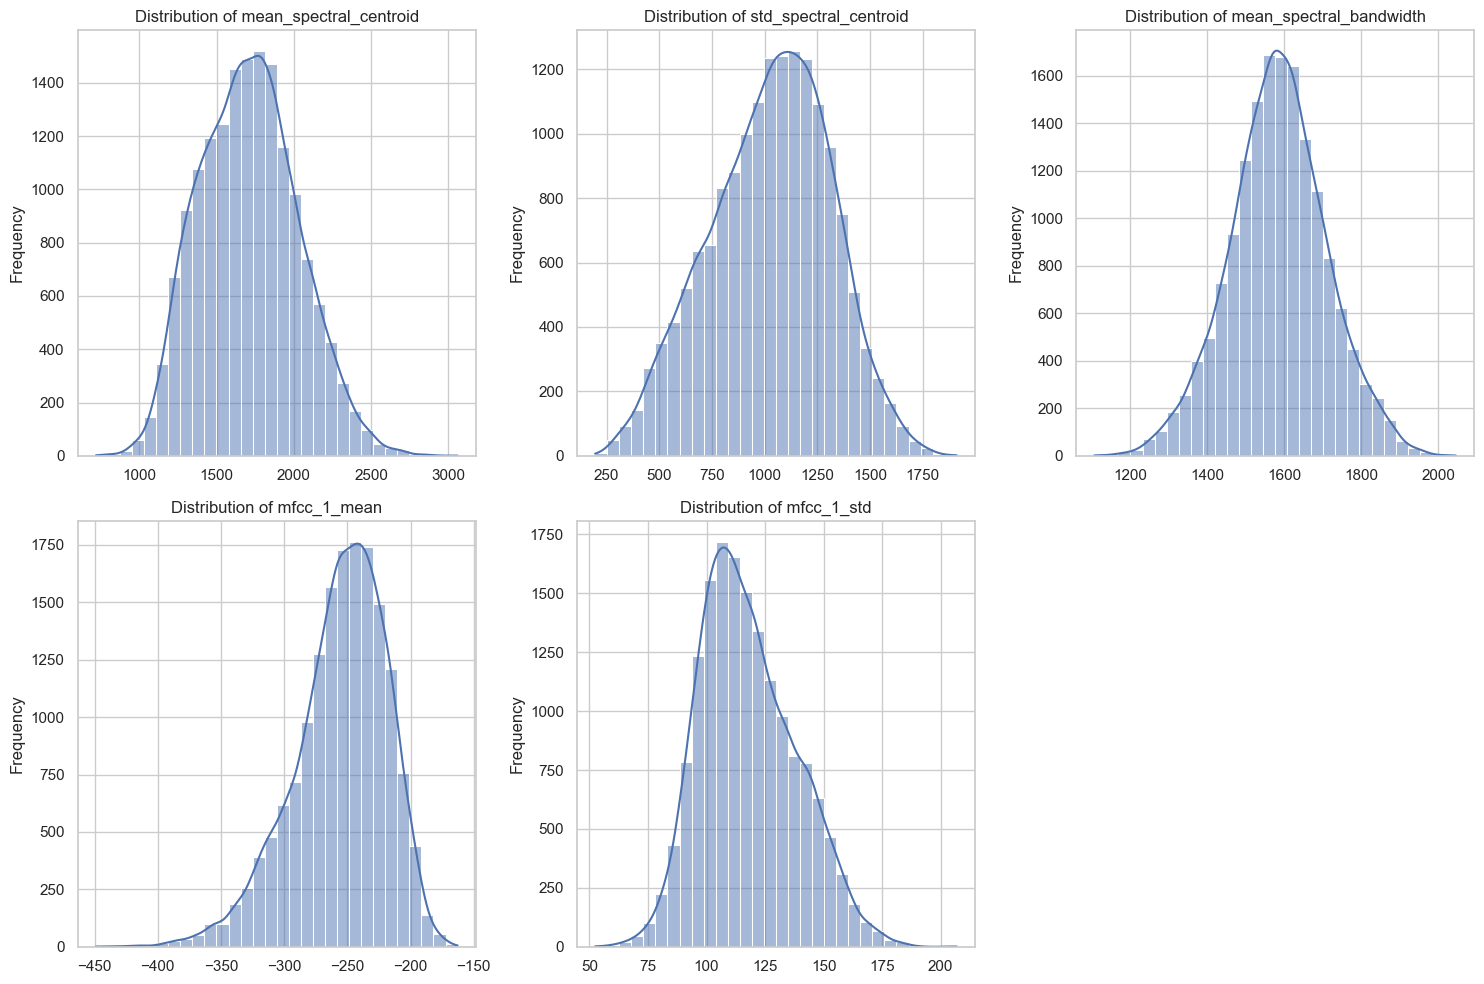

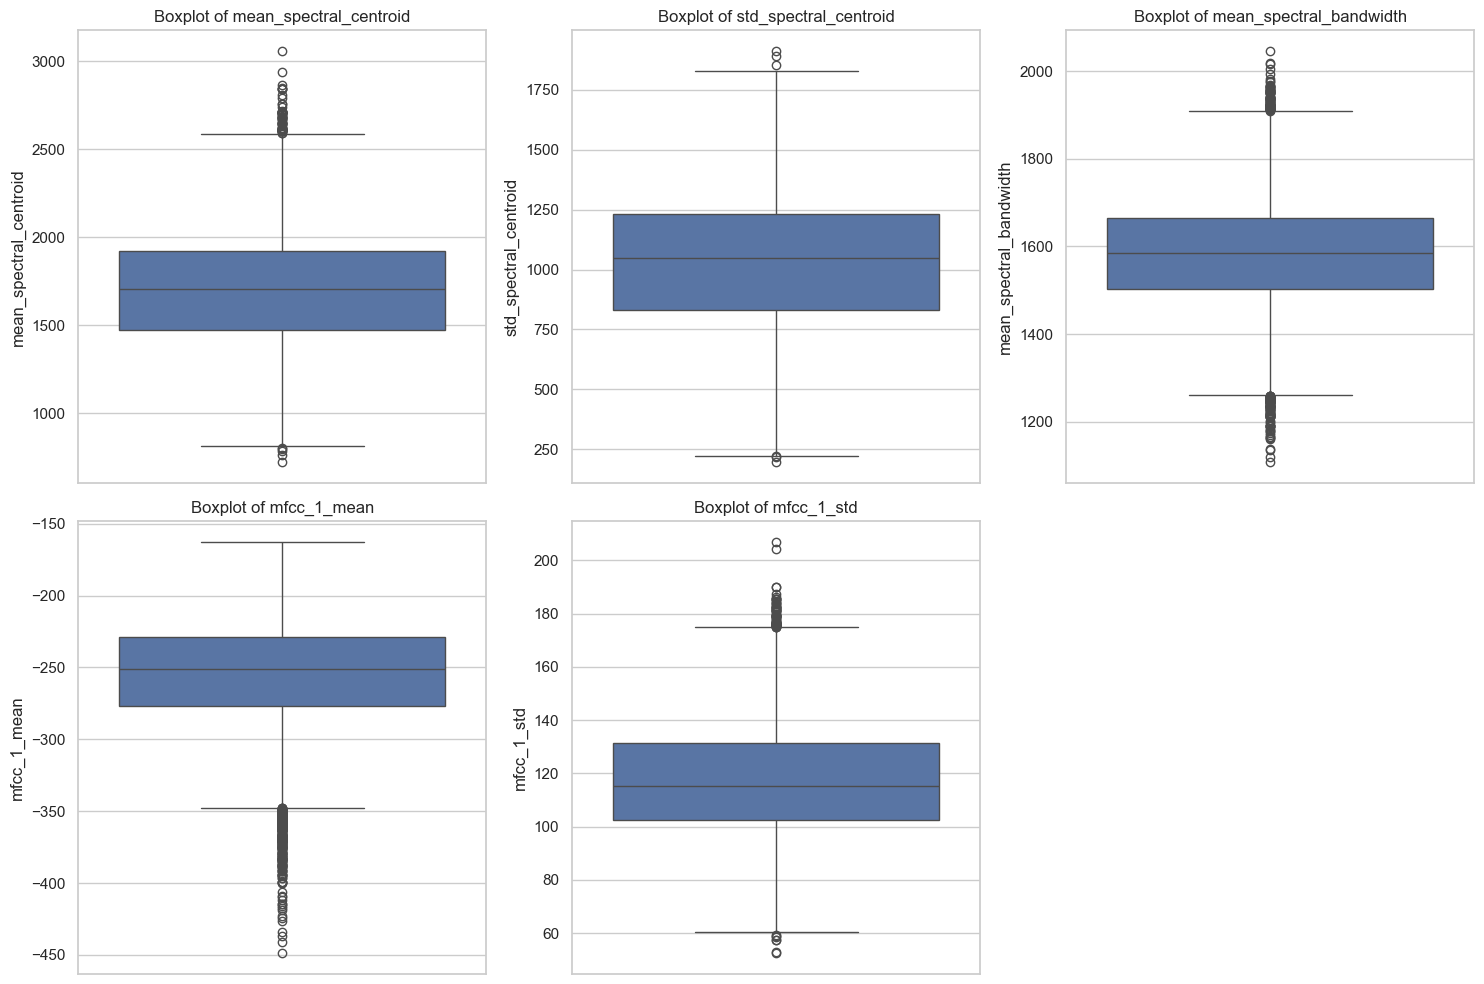

In [ ]:
# --- Visualize Feature Distributions ---

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Select a few key features to visualize
features_to_plot = [
    'mean_spectral_centroid',
    'std_spectral_centroid',
    'mean_spectral_bandwidth',
    'mfcc_1_mean',
    'mfcc_1_std'
]

# Create subplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Identify outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

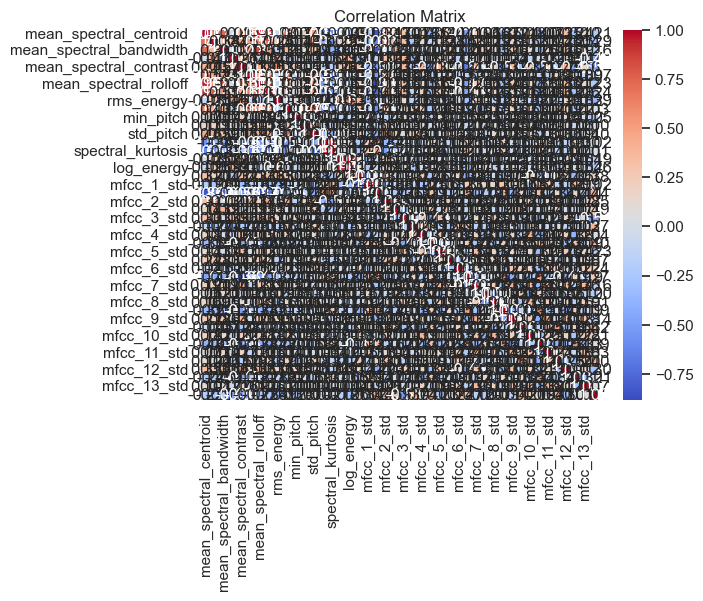

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Handle Outliers using IQR

In [ ]:
# --- Handle Outliers using IQR ---

print("--- Handling Outliers ---")
print(f"Initial dataset shape: {df.shape}")

# Select only the feature columns (excluding 'label') for outlier detection
feature_columns = df.columns.drop('label')
df_features = df[feature_columns]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature column
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Debug: Print shapes to understand the structures
# print(f"df_features shape: {df_features.shape}")
# print(f"lower_bound shape: {lower_bound.shape}")
# print(f"upper_bound shape: {upper_bound.shape}")

# Identify rows with outliers in any feature column
# Using broadcasting correctly by comparing DataFrame with Series
# The comparison operators should work correctly this way
outliers_below = (df_features < lower_bound)
outliers_above = (df_features > upper_bound)
outlier_condition = (outliers_below | outliers_above).any(axis=1)

# Count outliers
num_outliers = outlier_condition.sum()
print(f"Number of rows with outliers detected: {num_outliers}")

# Remove rows with outliers
df_no_outliers = df[~outlier_condition]

print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

# Update df to the cleaned version
df = df_no_outliers.reset_index(drop=True)

print("Outliers handled.")


--- Handling Outliers ---
Initial dataset shape: (16147, 44)
Number of rows with outliers detected: 6840
Dataset shape after removing outliers: (9307, 44)
Outliers handled.


#### Feature Scaling

In [ ]:
# --- Final Clean Data Loading and Preprocessing Code ---
# This cell loads the vocal gender features dataset correctly and prepares it for analysis.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Define the path to the data file
data_file_path = "../data/vocal_gender_features_new.csv"

# 2. Define the correct column names based on the project description
column_names = [
    'mean_spectral_centroid', 'std_spectral_centroid',
    'mean_spectral_bandwidth', 'std_spectral_bandwidth',
    'mean_spectral_contrast', 'mean_spectral_flatness',
    'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
    'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch',
    'spectral_skew', 'spectral_kurtosis',
    'energy_entropy', 'log_energy',
    'mfcc_1_mean', 'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std',
    'mfcc_3_mean', 'mfcc_3_std', 'mfcc_4_mean', 'mfcc_4_std',
    'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean', 'mfcc_6_std',
    'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
    'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
    'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
    'mfcc_13_mean', 'mfcc_13_std', 'label'
]

print("--- Loading and Preprocessing Human Voice Dataset ---")

# 3. Load the data, skipping the last row which contains column names as data
#    engine='python' is required for skipfooter to work
df_raw = pd.read_csv(data_file_path, header=None, skipfooter=1, engine='python')

# 4. Assign the correct column names
df_raw.columns = column_names

# 5. Convert feature columns to numeric (float64)
feature_columns = column_names[:-1]  # All columns except the last one ('label')
for col in feature_columns:
    df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

# 6. Convert the 'label' column to integer (using nullable Int64)
df_raw['label'] = pd.to_numeric(df_raw['label'], errors='coerce').astype('Int64')

print(f"Data loaded successfully!")
print(f"Dataset Shape (before cleaning): {df_raw.shape}")
# print(f"Column Names: {list(df_raw.columns)}")
# print("\nData Types:")
# print(df_raw.dtypes)
print(f"\nLabel Distribution (before cleaning):\n{df_raw['label'].value_counts(dropna=False)}")
print(f"\nMissing Values (before cleaning): {df_raw.isnull().any().any()}")

# --- Clean the Dataset ---
print("\n--- Cleaning the Dataset ---")

# 1. Drop the row with the missing label
missing_label_rows = df_raw[df_raw['label'].isna()].index
print(f"Found {len(missing_label_rows)} row(s) with missing label. Dropping them.")
df_cleaned = df_raw.drop(index=missing_label_rows).reset_index(drop=True)

# 2. Check for missing values in features (after dropping the label row)
missing_features_after = df_cleaned.iloc[:, :-1].isnull().sum() # Exclude the 'label' column
cols_with_missing = missing_features_after[missing_features_after > 0]

# 3. Drop rows with missing feature values
if not cols_with_missing.empty:
    total_missing_feature_values = cols_with_missing.sum()
    print(f"\nFound {total_missing_feature_values} missing value(s) in feature columns.")
    rows_with_missing_features = df_cleaned[df_cleaned.iloc[:, :-1].isnull().any(axis=1)].index
    print(f"Dropping {len(rows_with_missing_features)} row(s) with missing feature values.")
    df_final = df_cleaned.drop(index=rows_with_missing_features).reset_index(drop=True)
    print("Rows with missing features dropped.")
else:
    print("\nNo missing values found in feature columns after dropping the label row.")
    df_final = df_cleaned

# 5. Final verification
print(f"\n--- Final Dataset Shape: {df_final.shape} ---")
print(f"Label Distribution:\n{df_final['label'].value_counts(dropna=False)}")
print(f"Any remaining missing values? {df_final.isnull().any().any()}")

# Assign the final clean DataFrame to 'df'
df = df_final

# --- Handle Outliers using IQR ---
print("\n--- Handling Outliers ---")

# Select only the feature columns (excluding 'label') for outlier detection
df_features = df[feature_columns]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature column
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with outliers in any feature column
outliers_below = (df_features < lower_bound)
outliers_above = (df_features > upper_bound)
outlier_condition = (outliers_below | outliers_above).any(axis=1)

# Count outliers
num_outliers = outlier_condition.sum()
print(f"Number of rows with outliers detected: {num_outliers}")

# Remove rows with outliers
df_no_outliers = df[~outlier_condition]

print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

# Update df to the cleaned version
df = df_no_outliers.reset_index(drop=True)

print("Outliers handled.")

# --- Feature Scaling ---
print("\n--- Feature Scaling ---")
print(f"Dataset shape before scaling: {df.shape}")

# Separate features (X) and target label (y)
X = df.drop('label', axis=1)
y = df['label']

print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled_array = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame (optional, but often useful)
# This preserves column names and allows easier handling
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

print("Features scaled using StandardScaler.")

# Display a sample of the scaled features
print("\nSample of scaled features:")
print(X_scaled.head())

# Optional: Check the mean and std of scaled features (should be ~0 and ~1)
print(f"\nMean of scaled features (should be ~0): {X_scaled.mean().mean():.5f}")
print(f"Std of scaled features (should be ~1): {X_scaled.std().mean():.5f}")

print("\nData loading, cleaning, outlier handling, and feature scaling complete.")
print("The variable 'X_scaled' is now defined and ready for use.")


--- Loading and Preprocessing Human Voice Dataset ---
Data loaded successfully!
Dataset Shape (before cleaning): (16148, 44)

Label Distribution (before cleaning):
label
1       10379
0        5768
<NA>        1
Name: count, dtype: Int64

Missing Values (before cleaning): True

--- Cleaning the Dataset ---
Found 1 row(s) with missing label. Dropping them.

No missing values found in feature columns after dropping the label row.

--- Final Dataset Shape: (16147, 44) ---
Label Distribution:
label
1    10379
0     5768
Name: count, dtype: Int64
Any remaining missing values? False

--- Handling Outliers ---
Number of rows with outliers detected: 6840
Dataset shape after removing outliers: (9307, 44)
Outliers handled.

--- Feature Scaling ---
Dataset shape before scaling: (9307, 44)
Features shape (X): (9307, 43)
Target shape (y): (9307,)
Features scaled using StandardScaler.

Sample of scaled features:
   mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0          

### Address Class Imbalance

--- Checking Class Distribution ---
Class distribution before handling imbalance:
label
1    0.634361
0    0.365639
Name: proportion, dtype: Float64


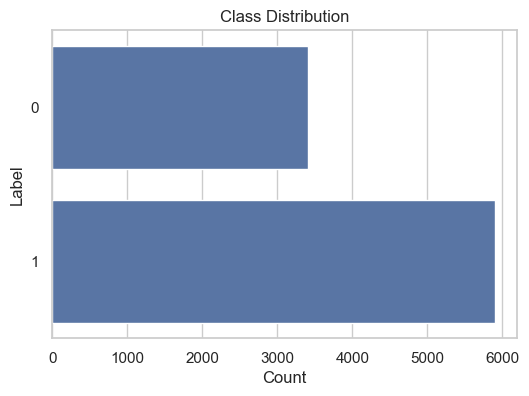


No significant class imbalance detected.


In [ ]:
# --- Address Class Imbalance ---

print("--- Checking Class Distribution ---")
print(f"Class distribution before handling imbalance:\n{y.value_counts(normalize=True)}")

# Optional: Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(y=y)
plt.title("Class Distribution")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()

# Check for imbalance
if y.value_counts(normalize=True).iloc[0] > 0.8 or y.value_counts(normalize=True).iloc[1] > 0.8:
    print("\nWarning: Significant class imbalance detected.")
else:
    print("\nNo significant class imbalance detected.")


### Train-Test Split

In [ ]:
# --- Train-Test Split ---

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training labels shape (y_train): {y_train.shape}")
print(f"Testing labels shape (y_test): {y_test.shape}")


Training set shape (X_train): (7445, 43)
Testing set shape (X_test): (1862, 43)
Training labels shape (y_train): (7445,)
Testing labels shape (y_test): (1862,)


### Model Training and Evaluation

In [ ]:
# --- Model Training and Evaluation ---

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



--- Model Evaluation ---
Accuracy: 0.9936

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       681
         1.0       0.99      0.99      0.99      1181

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



### Clustering Analysis


--- Cluster Distribution ---
cluster
0    5218
1    4089
Name: count, dtype: int64


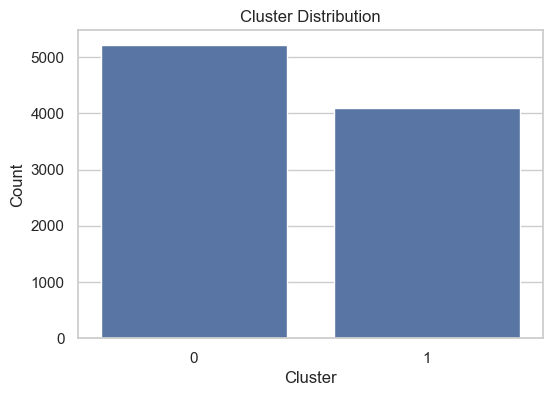

In [ ]:
# --- Clustering Analysis ---

from sklearn.cluster import KMeans

# Determine the number of clusters (e.g., 2 for binary classification)
n_clusters = 2

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Print the distribution of clusters
print("\n--- Cluster Distribution ---")
print(df['cluster'].value_counts())

# Optional: Visualize cluster distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='cluster', data=df)
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [ ]:
# --- Train Additional Classification Models ---

print("--- Training Additional Classification Models ---")

# We already have X_train, X_test, y_train, y_test, and X_scaled from previous steps
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time # To measure training time

# --- 1. Random Forest ---
print("\n1. Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Using 100 trees as a default

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted') # Use weighted for potential imbalance
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"   Accuracy: {acc_rf:.4f}")
print(f"   Precision: {prec_rf:.4f}")
print(f"   Recall: {rec_rf:.4f}")
print(f"   F1-Score: {f1_rf:.4f}")
print(f"   Training Time: {rf_train_time:.2f} seconds")


# --- 2. Support Vector Machine (SVM) ---
print("\n2. Training Support Vector Machine (SVM)...")
svm_model = SVC(random_state=42)

start_time = time.time()
svm_model.fit(X_train, y_train)
svm_train_time = time.time() - start_time

y_pred_svm = svm_model.predict(X_test)

# Calculate metrics for SVM
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
rec_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"   Accuracy: {acc_svm:.4f}")
print(f"   Precision: {prec_svm:.4f}")
print(f"   Recall: {rec_svm:.4f}")
print(f"   F1-Score: {f1_svm:.4f}")
print(f"   Training Time: {svm_train_time:.2f} seconds")


# --- 3. Logistic Regression (for comparison, re-run briefly) ---
print("\n3. Re-evaluating Logistic Regression (for comparison)...")
# Assuming 'model' from previous steps is Logistic Regression
# If not, uncomment the next two lines:
# logreg_model = LogisticRegression(random_state=42)
# logreg_model.fit(X_train, y_train)

# y_pred_lr = model.predict(X_test) # Assuming 'model' is the LR from before
# For consistency, let's re-train it quickly
logreg_model = LogisticRegression(random_state=42, max_iter=1000) # Increase max_iter if needed

start_time = time.time()
logreg_model.fit(X_train, y_train)
lr_train_time = time.time() - start_time

y_pred_lr = logreg_model.predict(X_test)

# Calculate metrics for Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"   Accuracy: {acc_lr:.4f}")
print(f"   Precision: {prec_lr:.4f}")
print(f"   Recall: {rec_lr:.4f}")
print(f"   F1-Score: {f1_lr:.4f}")
print(f"   Training Time: {lr_train_time:.2f} seconds")


# --- Summary Comparison ---
print("\n--- Model Performance Comparison ---")
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [acc_lr, acc_rf, acc_svm],
    'Precision': [prec_lr, prec_rf, prec_svm],
    'Recall': [rec_lr, rec_rf, rec_svm],
    'F1-Score': [f1_lr, f1_rf, f1_svm],
    'Train Time (s)': [lr_train_time, rf_train_time, svm_train_time]
}

import pandas as pd
comparison_df = pd.DataFrame(comparison_data)
# Sort by F1-Score (or Accuracy) to see the best model
comparison_df_sorted = comparison_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
print(comparison_df_sorted.to_string(index=False))


print("\n--- Additional Classification Models Trained and Evaluated ---")

# Store the best model based on F1-score for potential later use (optional)
best_model_name = comparison_df_sorted.iloc[0]['Model']
best_model_f1 = comparison_df_sorted.iloc[0]['F1-Score']
print(f"\nBest model based on F1-Score: {best_model_name} ({best_model_f1:.4f})")

# You can assign the best model object to a variable for later use if needed
# e.g., best_trained_model = logreg_model (if Logistic Regression was best)
# We'll keep the model objects (logreg_model, rf_model, svm_model) in memory for now.


--- Training Additional Classification Models ---

1. Training Random Forest Classifier...
   Accuracy: 0.9957
   Precision: 0.9957
   Recall: 0.9957
   F1-Score: 0.9957
   Training Time: 3.59 seconds

2. Training Support Vector Machine (SVM)...
   Accuracy: 0.9995
   Precision: 0.9995
   Recall: 0.9995
   F1-Score: 0.9995
   Training Time: 0.21 seconds

3. Re-evaluating Logistic Regression (for comparison)...
   Accuracy: 0.9936
   Precision: 0.9936
   Recall: 0.9936
   F1-Score: 0.9936
   Training Time: 0.03 seconds

--- Model Performance Comparison ---
              Model  Accuracy  Precision   Recall  F1-Score  Train Time (s)
                SVM  0.999463   0.999464 0.999463  0.999463        0.211128
      Random Forest  0.995704   0.995703 0.995704  0.995702        3.585536
Logistic Regression  0.993555   0.993555 0.993555  0.993555        0.027920

--- Additional Classification Models Trained and Evaluated ---

Best model based on F1-Score: SVM (0.9995)


#### K-Means Clustering

In [ ]:
# --- Perform K-Means Clustering ---

print("--- K-Means Clustering ---")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of K values to test
k_values = range(2, 11)

# Calculate Silhouette Scores for different K values
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Use scaled features
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

# Find the optimal K
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal K based on Silhouette Score: {optimal_k}")

# Train K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['cluster'] = labels

# Print cluster distribution
print("\nCluster Distribution:")
print(df['cluster'].value_counts())

# Visualize cluster centroids (if feasible)
# For high-dimensional data, PCA or t-SNE can be used for visualization

--- K-Means Clustering ---
K=2: Silhouette Score = 0.1098
K=3: Silhouette Score = 0.0854
K=4: Silhouette Score = 0.0881
K=5: Silhouette Score = 0.1023
K=6: Silhouette Score = 0.1210
K=7: Silhouette Score = 0.1235
K=8: Silhouette Score = 0.1336
K=9: Silhouette Score = 0.1355
K=10: Silhouette Score = 0.1396

Optimal K based on Silhouette Score: 10

Cluster Distribution:
cluster
1    1462
6    1264
3    1251
4    1192
0     905
5     890
2     745
9     717
7     462
8     419
Name: count, dtype: int64


#### DBSCAN Clustering

In [ ]:
# --- Perform DBSCAN Clustering ---

print("\n--- DBSCAN Clustering ---")

from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
clusters = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the DataFrame
df['dbscan_cluster'] = clusters

# Print cluster distribution
print("\nDBSCAN Cluster Distribution:")
print(df['dbscan_cluster'].value_counts())

# Visualize DBSCAN clusters (if feasible)
# For high-dimensional data, PCA or t-SNE can be used for visualization


--- DBSCAN Clustering ---

DBSCAN Cluster Distribution:
dbscan_cluster
-1    9307
Name: count, dtype: int64


#### Streamlit Application Development

In [ ]:
import joblib

# Save the scaler and SVM model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
import joblib

# Assuming 'scaler' is your fitted StandardScaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Perform Clustering Analysis (K-Means and DBSCAN)

--- Clustering Analysis ---

1. K-Means Clustering
   a. Finding optimal number of clusters (K)...
      K=2: Inertia=352736.47, Silhouette Score=0.1100
      K=3: Inertia=330215.45, Silhouette Score=0.1022
      K=4: Inertia=310215.99, Silhouette Score=0.0994
      K=5: Inertia=295699.98, Silhouette Score=0.1054
      K=6: Inertia=280788.73, Silhouette Score=0.1210
      K=7: Inertia=268095.01, Silhouette Score=0.1280
      K=8: Inertia=258864.03, Silhouette Score=0.1336
      K=9: Inertia=250535.19, Silhouette Score=0.1355
      K=10: Inertia=243785.15, Silhouette Score=0.1404


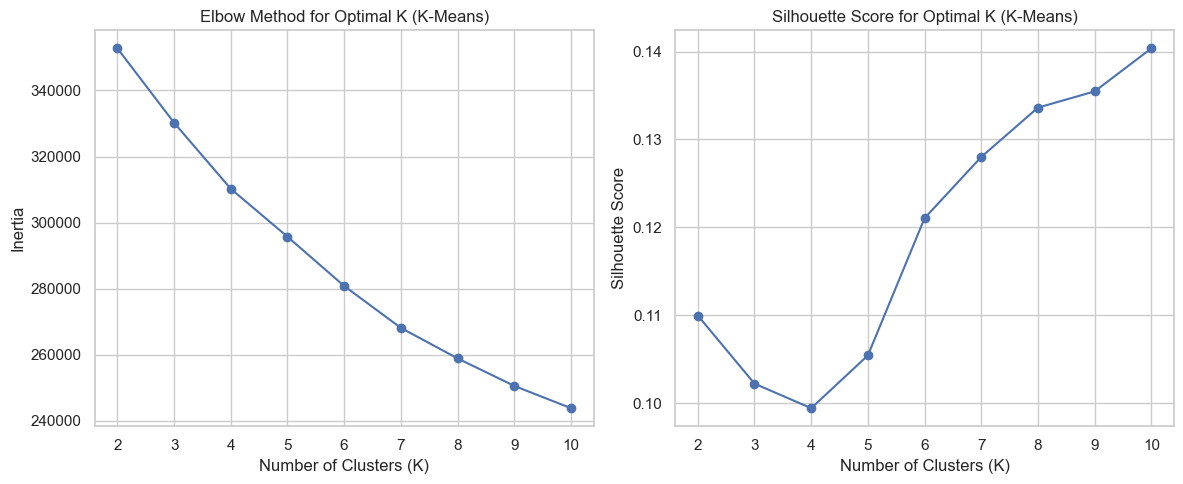

   b. Suggested optimal K based on Silhouette Score: 10
   c. Training K-Means with K=10...
   d. Final K-Means Evaluation:
      Silhouette Score: 0.1404
      Calinski-Harabasz Score: 662.79
   e. K-Means Cluster Distribution:
cluster_kmeans
0     915
1     722
2     843
3    1192
4     816
5     452
6    1302
7    1365
8     899
9     801
Name: count, dtype: int64

2. DBSCAN Clustering
   a. Trying DBSCAN with min_samples=50 and varying eps...
      eps=0.1: Only 0 cluster(s) found.
      eps=0.2: Only 0 cluster(s) found.
      eps=0.5: Only 0 cluster(s) found.
      eps=1.0: Only 0 cluster(s) found.
   b. No suitable DBSCAN configuration found with more than 1 cluster.

3. Comparing Clustering Results with True Labels
   a. K-Means Cluster vs True Label Cross-tabulation:
label              0     1   All
cluster_kmeans                  
0                902    13   915
1                  0   722   722
2                 25   818   843
3               1173    19  1192
4               

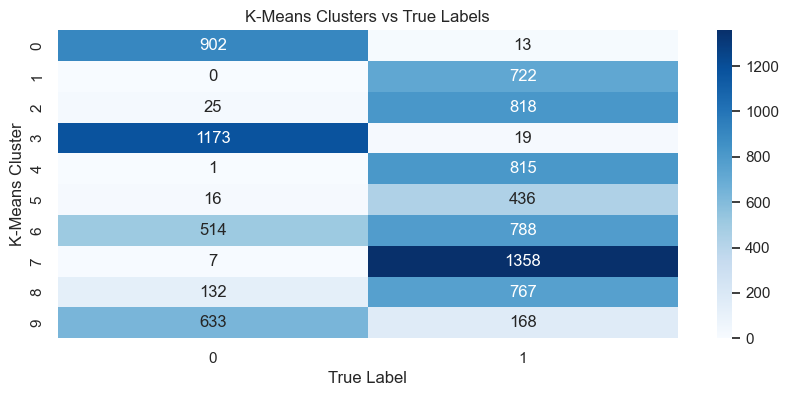


--- Clustering Analysis Complete ---


In [ ]:
# --- Clustering Analysis ---

print("--- Clustering Analysis ---")

# We'll use the scaled features X_scaled and the full dataset df
# Import necessary libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. K-Means Clustering ---
print("\n1. K-Means Clustering")

# a. Determine the optimal number of clusters (K) using the Elbow Method and Silhouette Score
print("   a. Finding optimal number of clusters (K)...")
k_values = range(2, 11)  # Test K from 2 to 10
inertias = []
silhouette_scores_kmeans = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    if k > 1:  # Silhouette score needs at least 2 clusters
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores_kmeans.append(score)
    else:
        silhouette_scores_kmeans.append(0) # Placeholder for k=1
    print(f"      K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_scores_kmeans[-1]:.4f}")

# b. Plot the Elbow Method graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# c. Plot the Silhouette Score graph
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Score for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# d. Choose the best K based on Silhouette Score (or Elbow)
# Often, a balance between low inertia and high silhouette is desired.
# Let's pick the K with the highest Silhouette Score for demonstration.
# You might choose a K where the silhouette score is high and the inertia elbow is visible.
optimal_k_kmeans = k_values[np.argmax(silhouette_scores_kmeans)]
print(f"   b. Suggested optimal K based on Silhouette Score: {optimal_k_kmeans}")

# e. Train K-Means with the chosen K
print(f"   c. Training K-Means with K={optimal_k_kmeans}...")
kmeans_final = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

# f. Add K-Means cluster labels to the dataframe
df['cluster_kmeans'] = kmeans_labels

# g. Evaluate the final K-Means clustering
final_silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
final_calinski_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
print(f"   d. Final K-Means Evaluation:")
print(f"      Silhouette Score: {final_silhouette_kmeans:.4f}")
print(f"      Calinski-Harabasz Score: {final_calinski_kmeans:.2f}")

# h. Analyze cluster distribution
print("   e. K-Means Cluster Distribution:")
print(df['cluster_kmeans'].value_counts().sort_index())


# --- 2. DBSCAN Clustering ---
print("\n2. DBSCAN Clustering")

# a. Determine good parameters for DBSCAN (eps and min_samples)
# This often requires experimentation. Let's try a range of values.
# A common heuristic for min_samples is min_samples >= number of features (43 in our case)
# or min_samples = 2 * number of dimensions. Let's try min_samples = 50 as a start.
# For eps, we can look at the k-distance graph (distance to the k-th nearest neighbor).
# However, for simplicity here, we'll try a few fixed values.

# Let's try DBSCAN with min_samples=50 and vary eps
eps_values_to_try = [0.1, 0.2, 0.5, 1.0]
min_samples_dbscan = 50

best_silhouette_dbscan = -1
best_eps_dbscan = None
best_dbscan_model = None
best_dbscan_labels = None

print(f"   a. Trying DBSCAN with min_samples={min_samples_dbscan} and varying eps...")
for eps in eps_values_to_try:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples_dbscan)
    dbscan_labels_temp = dbscan.fit_predict(X_scaled)
    
    # Count number of clusters (excluding noise points labeled -1)
    unique_labels_temp = set(dbscan_labels_temp)
    n_clusters_temp = len(unique_labels_temp) - (1 if -1 in unique_labels_temp else 0)
    
    if n_clusters_temp > 1: # Need at least 2 clusters for Silhouette
        # Calculate Silhouette Score (excluding noise points -1)
        core_samples_mask = (dbscan_labels_temp != -1)
        if np.sum(core_samples_mask) > 1: # Need more than 1 core sample
            try:
                score_temp = silhouette_score(X_scaled[core_samples_mask], dbscan_labels_temp[core_samples_mask])
                print(f"      eps={eps}: Clusters={n_clusters_temp}, Noise Points={np.sum(dbscan_labels_temp == -1)}, Silhouette Score={score_temp:.4f}")
                if score_temp > best_silhouette_dbscan:
                    best_silhouette_dbscan = score_temp
                    best_eps_dbscan = eps
                    best_dbscan_model = dbscan
                    best_dbscan_labels = dbscan_labels_temp
            except Exception as e:
                print(f"      eps={eps}: Error calculating Silhouette Score: {e}")
        else:
             print(f"      eps={eps}: Not enough core samples for Silhouette calculation.")
    else:
        print(f"      eps={eps}: Only {n_clusters_temp} cluster(s) found.")

if best_dbscan_model is not None:
    print(f"   b. Best DBSCAN parameters found: eps={best_eps_dbscan}, min_samples={min_samples_dbscan}")
    print(f"      Best Silhouette Score: {best_silhouette_dbscan:.4f}")
    
    # c. Use the best DBSCAN model found
    dbscan_labels = best_dbscan_labels
    
    # d. Add DBSCAN cluster labels to the dataframe
    df['cluster_dbscan'] = dbscan_labels
    
    # e. Evaluate the final DBSCAN clustering (on core samples only)
    core_samples_mask_final = (dbscan_labels != -1)
    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_dbscan = np.sum(dbscan_labels == -1)
    
    if n_clusters_dbscan > 1 and np.sum(core_samples_mask_final) > 1:
        final_silhouette_dbscan = silhouette_score(X_scaled[core_samples_mask_final], dbscan_labels[core_samples_mask_final])
        final_calinski_dbscan = calinski_harabasz_score(X_scaled[core_samples_mask_final], dbscan_labels[core_samples_mask_final])
        print(f"   c. Final DBSCAN Evaluation (on core samples):")
        print(f"      Number of Clusters: {n_clusters_dbscan}")
        print(f"      Number of Noise Points: {n_noise_dbscan}")
        print(f"      Silhouette Score (core samples): {final_silhouette_dbscan:.4f}")
        print(f"      Calinski-Harabasz Score (core samples): {final_calinski_dbscan:.2f}")
    else:
        print(f"   c. Final DBSCAN Evaluation: Not enough clusters or core samples for evaluation.")
        
    # f. Analyze cluster distribution (including noise)
    print("   d. DBSCAN Cluster Distribution (including noise -1):")
    print(df['cluster_dbscan'].value_counts().sort_index())
    
else:
    print("   b. No suitable DBSCAN configuration found with more than 1 cluster.")


# --- 3. Compare Clustering Results with True Labels ---
print("\n3. Comparing Clustering Results with True Labels")

# a. K-Means vs True Label
if 'cluster_kmeans' in df.columns:
    print("   a. K-Means Cluster vs True Label Cross-tabulation:")
    crosstab_kmeans = pd.crosstab(df['cluster_kmeans'], df['label'], margins=True)
    print(crosstab_kmeans)
    
    # Visualize
    plt.figure(figsize=(10, 4))
    sns.heatmap(crosstab_kmeans.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues')
    plt.title('K-Means Clusters vs True Labels')
    plt.xlabel('True Label')
    plt.ylabel('K-Means Cluster')
    plt.show()

# b. DBSCAN vs True Label (if DBSCAN was successful)
if 'cluster_dbscan' in df.columns and best_dbscan_model is not None:
    print("   b. DBSCAN Cluster vs True Label Cross-tabulation:")
    crosstab_dbscan = pd.crosstab(df['cluster_dbscan'], df['label'], margins=True)
    print(crosstab_dbscan)
    
    # Visualize (excluding noise cluster -1 for clarity in main heatmap)
    # Find clusters that are not noise (-1)
    non_noise_dbscan = df[df['cluster_dbscan'] != -1]
    if not non_noise_dbscan.empty:
        plt.figure(figsize=(10, 4))
        crosstab_dbscan_non_noise = pd.crosstab(non_noise_dbscan['cluster_dbscan'], non_noise_dbscan['label'])
        sns.heatmap(crosstab_dbscan_non_noise, annot=True, fmt='d', cmap='Greens')
        plt.title('DBSCAN Clusters (excluding noise) vs True Labels')
        plt.xlabel('True Label')
        plt.ylabel('DBSCAN Cluster')
        plt.show()
    else:
        print("      No non-noise points found for DBSCAN visualization.")

print("\n--- Clustering Analysis Complete ---")


###  Refine DBSCAN Parameters (Optional)

In [ ]:
# --- Refine DBSCAN Parameters ---

# Import the required module
from sklearn.cluster import DBSCAN

print("\n--- Refining DBSCAN Parameters ---")

# Try a wider range of eps values
eps_values_to_refine = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
min_samples_dbscan = 50

best_silhouette_dbscan = -1
best_eps_dbscan = None
best_dbscan_model = None
best_dbscan_labels = None

print(f"   a. Trying DBSCAN with min_samples={min_samples_dbscan} and varying eps...")
for eps in eps_values_to_refine:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples_dbscan)
    dbscan_labels_temp = dbscan.fit_predict(X_scaled)

    # Count number of clusters (excluding noise points -1)
    unique_labels_temp = set(dbscan_labels_temp)
    n_clusters_temp = len(unique_labels_temp) - (1 if -1 in unique_labels_temp else 0)

    if n_clusters_temp > 1: # Need at least 2 clusters for Silhouette
        # Calculate Silhouette Score (excluding noise points -1)
        core_samples_mask = (dbscan_labels_temp != -1)
        if np.sum(core_samples_mask) > 1: # Need more than 1 core sample
            try:
                score_temp = silhouette_score(X_scaled[core_samples_mask], dbscan_labels_temp[core_samples_mask])
                print(f"      eps={eps}: Clusters={n_clusters_temp}, Noise Points={np.sum(dbscan_labels_temp == -1)}, Silhouette Score={score_temp:.4f}")
                if score_temp > best_silhouette_dbscan:
                    best_silhouette_dbscan = score_temp
                    best_eps_dbscan = eps
                    best_dbscan_model = dbscan
                    best_dbscan_labels = dbscan_labels_temp
            except Exception as e:
                print(f"      eps={eps}: Error calculating Silhouette Score: {e}")
        else:
             print(f"      eps={eps}: Not enough core samples for Silhouette calculation.")
    else:
        print(f"      eps={eps}: Only {n_clusters_temp} cluster(s) found.")

if best_dbscan_model is not None:
    print(f"   b. Best DBSCAN parameters found: eps={best_eps_dbscan}, min_samples={min_samples_dbscan}")
    print(f"      Best Silhouette Score: {best_silhouette_dbscan:.4f}")

    # c. Use the best DBSCAN model found
    dbscan_labels = best_dbscan_labels

    # d. Add DBSCAN cluster labels to the dataframe
    df['cluster_dbscan'] = dbscan_labels

    # e. Evaluate the final DBSCAN clustering (on core samples only)
    core_samples_mask_final = (dbscan_labels != -1)
    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_dbscan = np.sum(dbscan_labels == -1)

    if n_clusters_dbscan > 1 and np.sum(core_samples_mask_final) > 1:
        final_silhouette_dbscan = silhouette_score(X_scaled[core_samples_mask_final], dbscan_labels[core_samples_mask_final])
        # Calinski-Harabasz might not be ideal for DBSCAN clusters, but we can try
        # final_calinski_dbscan = calinski_harabasz_score(X_scaled[core_samples_mask_final], dbscan_labels[core_samples_mask_final])
        print(f"   c. Final DBSCAN Evaluation (on core samples):")
        print(f"      Number of Clusters: {n_clusters_dbscan}")
        print(f"      Number of Noise Points: {n_noise_dbscan}")
        print(f"      Silhouette Score (core samples): {final_silhouette_dbscan:.4f}")
        # print(f"      Calinski-Harabasz Score (core samples): {final_calinski_dbscan:.2f}")
    else:
        print("   c. Final DBSCAN Evaluation: Not enough clusters or core samples for evaluation.")

    # f. Analyze cluster distribution (including noise)
    print("   d. DBSCAN Cluster Distribution (including noise -1):")
    print(df['cluster_dbscan'].value_counts().sort_index())
else:
    print("   b. No suitable DBSCAN configuration found with more than 1 cluster.")



--- Refining DBSCAN Parameters ---
   a. Trying DBSCAN with min_samples=50 and varying eps...
      eps=0.01: Only 0 cluster(s) found.
      eps=0.05: Only 0 cluster(s) found.
      eps=0.1: Only 0 cluster(s) found.
      eps=0.2: Only 0 cluster(s) found.
      eps=0.5: Only 0 cluster(s) found.
      eps=1.0: Only 0 cluster(s) found.
   b. No suitable DBSCAN configuration found with more than 1 cluster.
